<h3>Controlled Z gates</h3>

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

from math import pi

qreg1 =  QuantumRegister(2)
creg1 = ClassicalRegister(2)

# define our quantum circuit
mycircuit1 = QuantumCircuit(qreg1,creg1)

def controlled_anti_z(circuit, q0, q1):
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)

def controlled_z(circuit, q0, q1):
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)

controlled_z(mycircuit1, qreg1[0],qreg1[1])
# mycircuit1.cz(qreg1[0],qreg1[1])
# mycircuit1.cx(qreg1[0],qreg1[1])
# mycircuit1.cz(qreg1[0],qreg1[1])
# mycircuit1.cx(qreg1[0],qreg1[1])
# mycircuit1.cz(qreg1[0],qreg1[1])

job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
print(u)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


<h3>Oracle query matrix</h3>

In [17]:
qreg2 =  QuantumRegister(8)
creg2 = ClassicalRegister(8)

# define our quantum circuit
mycircuit2 = QuantumCircuit(qreg2,creg2)

mycircuit2.ccx(qreg2[0],qreg2[1],qreg2[4])
mycircuit2.ccx(qreg2[2],qreg2[3],qreg2[5])
mycircuit2.ccx(qreg2[4],qreg2[5],qreg2[6])
controlled_anti_z(mycircuit2,qreg2[6],qreg2[7])

job = execute(mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit2,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<8): val  = " "+val
        s = s + val
    print(s)

     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [14]:
qreg3 =  QuantumRegister(4)
creg3 = ClassicalRegister(4)

# define our quantum circuit
mycircuit3 = QuantumCircuit(qreg3,creg3)

def oracle(number):
    if(number%4 < 2):
        mycircuit3.x(qreg3[1])
    if(number%8 < 4):
        mycircuit3.x(qreg3[2])
    mycircuit3.ccx(qreg3[2],qreg3[1],qreg3[3])
    if(number%2 == 0):
        controlled_anti_z(mycircuit3,qreg3[3],qreg3[0])
    else:
        controlled_z(mycircuit3,qreg3[3],qreg3[0])
    mycircuit3.ccx(qreg3[2],qreg3[1],qreg3[3])
    if(number%8 < 4):
        mycircuit3.x(qreg3[2])
    if(number%4 < 2):
        mycircuit3.x(qreg3[1])

oracle(1)

job = execute(mycircuit3,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit3,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0

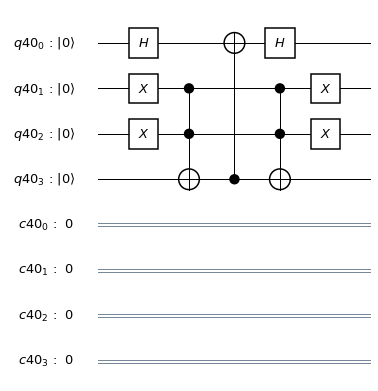

In [54]:
mycircuit3.draw(output='mpl')

In [12]:
qreg4 =  QuantumRegister(3)
creg4 = ClassicalRegister(3)

# define our quantum circuit
mycircuit4 = QuantumCircuit(qreg4,creg4)

#controlled_anti_z(mycircuit4,qreg4[1],qreg4[0])

mycircuit4.z(qreg4[0])
mycircuit4.x(qreg4[0])
mycircuit4.z(qreg4[0])
mycircuit4.x(qreg4[0])
mycircuit4.z(qreg4[0])

job = execute(mycircuit4,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit4,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


In [68]:
qreg5 =  QuantumRegister(2)
creg5 = ClassicalRegister(2)

# define our quantum circuit
mycircuit5 = QuantumCircuit(qreg5,creg5)

#mycircuit5.x(qreg5[1])
controlled_z(mycircuit5,qreg5[1],qreg5[0])
#mycircuit5.x(qreg5[1])

job = execute(mycircuit5,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit5,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0 -1.0


<h3>Diffusion matrix</h3>
<br>
Check for the details of the implementation: https://stackoverflow.com/questions/51190773/how-to-realize-the-grovers-diffusion-operator-in-q

In [63]:
qreg6 =  QuantumRegister(3)
creg6 = ClassicalRegister(3)

# define our quantum circuit
mycircuit6 = QuantumCircuit(qreg6,creg6)

mycircuit6.x(qreg6[2])
mycircuit6.h(qreg6[2])

mycircuit6.h(qreg6[1])
mycircuit6.h(qreg6[0])
mycircuit6.x(qreg6[1])
mycircuit6.x(qreg6[0])

mycircuit6.ccx(qreg6[1],qreg6[0],qreg6[2])

mycircuit6.x(qreg6[1])
mycircuit6.x(qreg6[0])
mycircuit6.h(qreg6[1])
mycircuit6.h(qreg6[0])

mycircuit6.h(qreg6[2])
mycircuit6.x(qreg6[2])

job = execute(mycircuit6,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit6,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

  0.5 -0.5 -0.5 -0.5  0.0  0.0  0.0  0.0
 -0.5  0.5 -0.5 -0.5  0.0  0.0  0.0  0.0
 -0.5 -0.5  0.5 -0.5  0.0  0.0  0.0  0.0
 -0.5 -0.5 -0.5  0.5  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


In [4]:
qreg7 =  QuantumRegister(5)
creg7 = ClassicalRegister(5)

# define our quantum circuit
mycircuit7 = QuantumCircuit(qreg7,creg7)

mycircuit7.x(qreg7[4])
mycircuit7.h(qreg7[4])

for i in range(3):
    mycircuit7.h(qreg7[i])
    mycircuit7.x(qreg7[i])

mycircuit7.ccx(qreg7[1],qreg7[0],qreg7[3])
mycircuit7.ccx(qreg7[2],qreg7[3],qreg7[4])
mycircuit7.ccx(qreg7[1],qreg7[0],qreg7[3])

for i in range(3):
    mycircuit7.x(qreg7[i])
    mycircuit7.h(qreg7[i])

mycircuit7.h(qreg7[4])
mycircuit7.x(qreg7[4])

mycircuit7.z(qreg7[0])
mycircuit7.x(qreg7[0])
mycircuit7.z(qreg7[0])
mycircuit7.x(qreg7[0])

job = execute(mycircuit7,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit7,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

-0.75 0.25 0.25 0.25 0.25 0.25 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25-0.75 0.25 0.25 0.25 0.25 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25 0.25-0.75 0.25 0.25 0.25 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25 0.25 0.25-0.75 0.25 0.25 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25 0.25 0.25 0.25-0.75 0.25 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25 0.25 0.25 0.25 0.25-0.75 0.25 0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.25 0.25 0.25 0.25 0.25 0.25-0.7

<h3>Testing Grover on 2 qubits.<h3>

{'000': 10000}


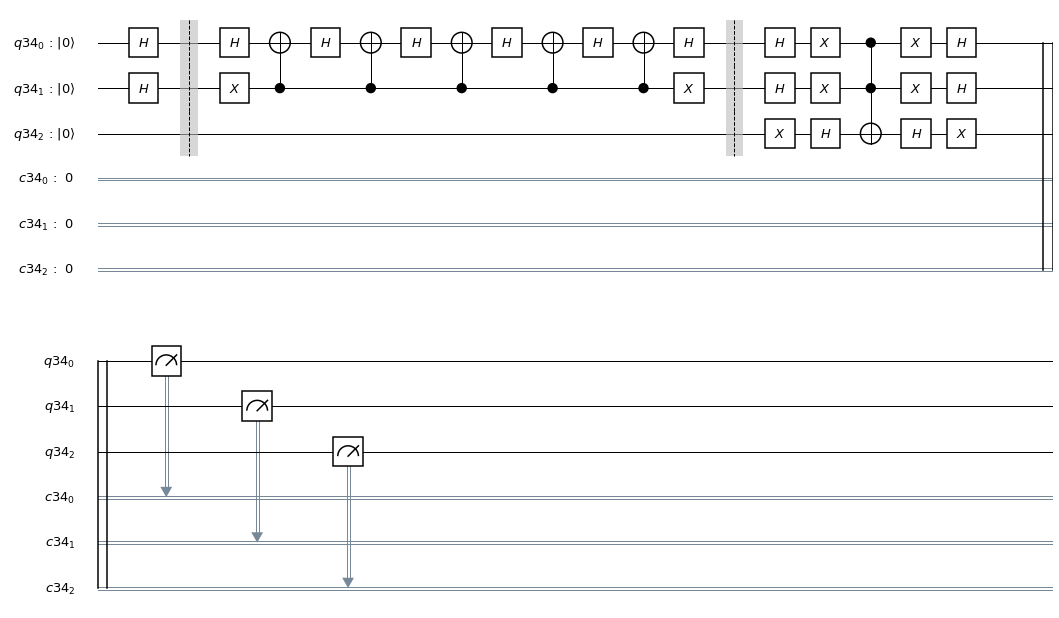

In [36]:
qreg8 =  QuantumRegister(3)
creg8 = ClassicalRegister(3)

# define our quantum circuit
mycircuit8 = QuantumCircuit(qreg8,creg8)

def diffusion():
    mycircuit8.x(qreg8[2])
    mycircuit8.h(qreg8[2])
    
    mycircuit8.h(qreg8[1])
    mycircuit8.h(qreg8[0])
    mycircuit8.x(qreg8[1])
    mycircuit8.x(qreg8[0])

    mycircuit8.ccx(qreg8[1],qreg8[0],qreg8[2])

    mycircuit8.x(qreg8[1])
    mycircuit8.x(qreg8[0])
    mycircuit8.h(qreg8[1])
    mycircuit8.h(qreg8[0])

    mycircuit8.h(qreg8[2])
    mycircuit8.x(qreg8[2])
    
def oracle(number):
    if(number%4 < 2):
        mycircuit8.x(qreg8[1])
    if(number%2 == 0):
        controlled_anti_z(mycircuit8,qreg8[1],qreg8[0])
    else:
        controlled_z(mycircuit8,qreg8[1],qreg8[0])
    if(number%4 < 2):
        mycircuit8.x(qreg8[1])

#Grover itself
for i in range(2):
    mycircuit8.h(qreg8[i])
mycircuit8.barrier()
oracle(0)
mycircuit8.barrier()
diffusion()

mycircuit8.measure(qreg8,creg8)

job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
counts1 = job.result().get_counts(mycircuit8)
print(counts1) # print the outcomes

mycircuit8.draw(output='mpl')

<h3>Testing Grover on 3 qubits.</h3>

{'00000': 7820, '00100': 319, '00101': 315, '00111': 310, '00010': 300, '00110': 304, '00011': 315, '00001': 317}


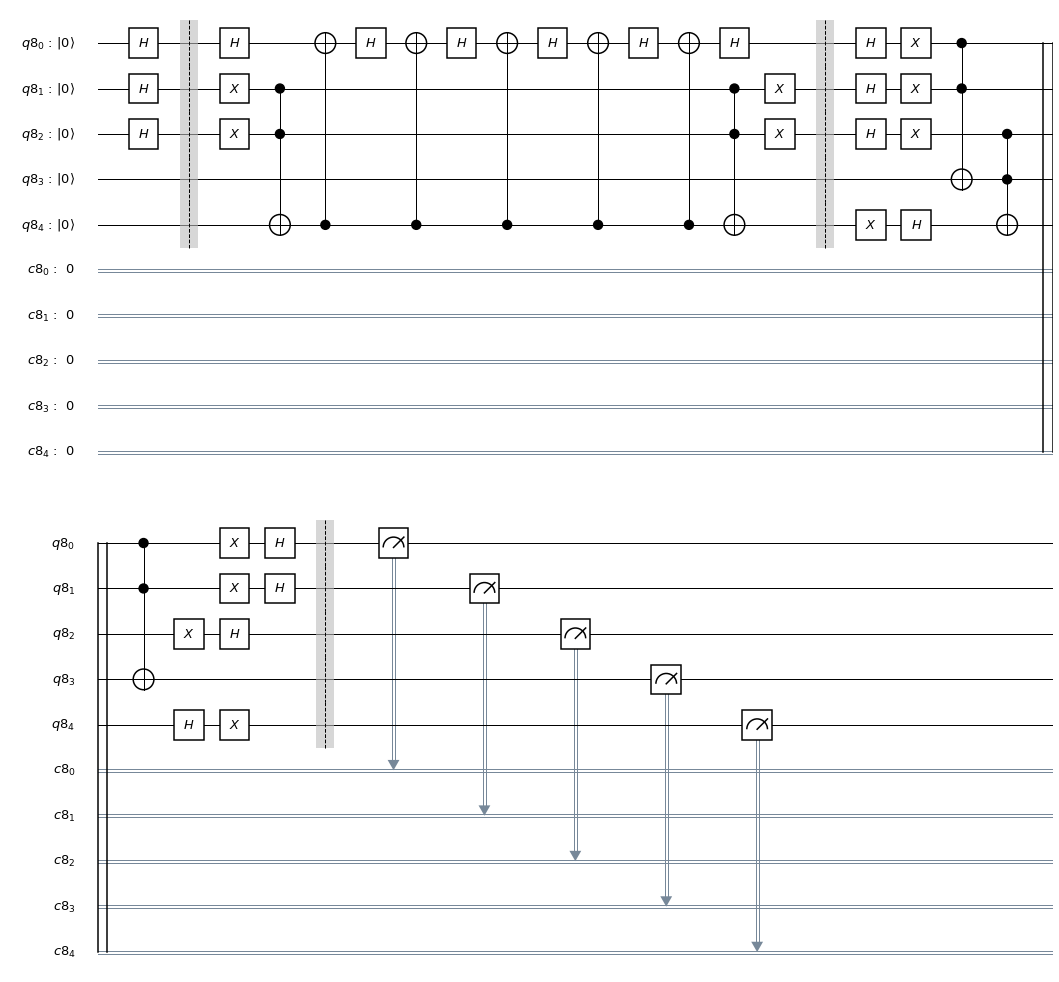

In [9]:
qreg9 =  QuantumRegister(5)
creg9 = ClassicalRegister(5)

# define our quantum circuit
mycircuit9 = QuantumCircuit(qreg9,creg9)

def oracle(number):
    if(number%4 < 2):
        mycircuit9.x(qreg9[1])
    if(number%8 < 4):
        mycircuit9.x(qreg9[2])
    mycircuit9.ccx(qreg9[2],qreg9[1],qreg9[4])
    if(number%2 == 0):
        controlled_anti_z(mycircuit9,qreg9[4],qreg9[0])
    else:
        controlled_z(mycircuit9,qreg9[4],qreg9[0])
    mycircuit9.ccx(qreg9[2],qreg9[1],qreg9[4])
    if(number%8 < 4):
        mycircuit9.x(qreg9[2])
    if(number%4 < 2):
        mycircuit9.x(qreg9[1])

def diffusion():
    mycircuit9.x(qreg9[4])
    mycircuit9.h(qreg9[4])

    for i in range(3):
        mycircuit9.h(qreg9[i])
        mycircuit9.x(qreg9[i])

    mycircuit9.ccx(qreg9[1],qreg9[0],qreg9[3])
    mycircuit9.ccx(qreg9[2],qreg9[3],qreg9[4])
    mycircuit9.ccx(qreg9[1],qreg9[0],qreg9[3])

    for i in range(3):
        mycircuit9.x(qreg9[i])
        mycircuit9.h(qreg9[i])

    mycircuit9.h(qreg9[4])
    mycircuit9.x(qreg9[4])
        
#Grover itself
for i in range(3):
    mycircuit9.h(qreg9[i])
mycircuit9.barrier()
#Try 1,2,6,12 iterations of Grover
for i in range(1):
    oracle(0)
    #oracle(1)
    mycircuit9.barrier()
    diffusion()
    mycircuit9.barrier()

mycircuit9.measure(qreg9,creg9)

job = execute(mycircuit9,Aer.get_backend('qasm_simulator'),shots=10000)
counts1 = job.result().get_counts(mycircuit9)
print(counts1) # print the outcomes

mycircuit9.draw(output='mpl')